In [ ]:
# function ConnectButton(){
#     console.log("Connect pushed");
#     document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
# }

# var colab = setInterval(ConnectButton,3000);

# clearInterval(colab)

In [ ]:
# a = []
# while True:
#   a.append('1')

In [2]:
!pip install opencv-python-headless


  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import re

In [22]:
# read data from  google Drive
# !unzip './Eye_Data.zip'

Archive:  ./Eye_Data.zip
   creating: Eye_Data/
   creating: Eye_Data/test/
   creating: Eye_Data/test/0/
  inflating: Eye_Data/test/0/normal_100.jpg  
  inflating: Eye_Data/test/0/normal_1000.jpg  
  inflating: Eye_Data/test/0/normal_1007.jpg  
  inflating: Eye_Data/test/0/normal_1008.jpg  
  inflating: Eye_Data/test/0/normal_1013.jpg  
  inflating: Eye_Data/test/0/normal_1015.jpg  
  inflating: Eye_Data/test/0/normal_1029.jpg  
  inflating: Eye_Data/test/0/normal_1038.jpg  
  inflating: Eye_Data/test/0/normal_1040.jpg  
  inflating: Eye_Data/test/0/normal_1042.jpg  
  inflating: Eye_Data/test/0/normal_1044.jpg  
  inflating: Eye_Data/test/0/normal_1050.jpg  
  inflating: Eye_Data/test/0/normal_1056.jpg  
  inflating: Eye_Data/test/0/normal_1069.jpg  
  inflating: Eye_Data/test/0/normal_1077.jpg  
  inflating: Eye_Data/test/0/normal_1078.jpg  
  inflating: Eye_Data/test/0/normal_1094.jpg  
  inflating: Eye_Data/test/0/normal_1112.jpg  
  inflating: Eye_Data/test/0/normal_1135.jpg  
  

## **Preprocessing data set**

In [4]:
# this function collect label from directory name
def label_maker(path):
    return re.split('[/._\\\]', path)[-3]

# this function resize and read pictures from path
def imread(path):
    ans = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    ans = cv2.resize(ans, (128,128), interpolation = cv2.INTER_AREA)
    return ans


In [5]:
# read dataset paths from directory
path_train = glob('./Eye_Data/train/*/*')
path_test = glob('./Eye_Data/test/*/*')
DF_train = pd.DataFrame(path_train, columns=['train path'])
DF_test = pd.DataFrame(path_test, columns=['test path'])

In [6]:
path_train

['./Eye_Data/train/0/normal_383.jpg',
 './Eye_Data/train/0/normal_1227.jpg',
 './Eye_Data/train/0/normal_566.jpg',
 './Eye_Data/train/0/normal_1941.jpg',
 './Eye_Data/train/0/normal_1750.jpg',
 './Eye_Data/train/0/normal_26.jpg',
 './Eye_Data/train/0/normal_2708.jpg',
 './Eye_Data/train/0/normal_1150.jpg',
 './Eye_Data/train/0/normal_401.jpg',
 './Eye_Data/train/0/normal_729.jpg',
 './Eye_Data/train/0/normal_1753.jpg',
 './Eye_Data/train/0/normal_2922.jpg',
 './Eye_Data/train/0/normal_56.jpg',
 './Eye_Data/train/0/normal_2667.jpg',
 './Eye_Data/train/0/normal_2619.jpg',
 './Eye_Data/train/0/normal_3010.jpg',
 './Eye_Data/train/0/normal_1912.jpg',
 './Eye_Data/train/0/normal_481.jpg',
 './Eye_Data/train/0/normal_482.jpg',
 './Eye_Data/train/0/normal_2994.jpg',
 './Eye_Data/train/0/normal_656.jpg',
 './Eye_Data/train/0/normal_1654.jpg',
 './Eye_Data/train/0/normal_1004.jpg',
 './Eye_Data/train/0/normal_3072.jpg',
 './Eye_Data/train/0/normal_1118.jpg',
 './Eye_Data/train/0/normal_1488.jpg

In [7]:
# create y test & train
train_label = DF_train['train path'].map(label_maker)
test_label = DF_test['test path'].map(label_maker)

y_train = np.array(pd.get_dummies(pd.DataFrame(train_label))).astype(np.int8)
y_test = np.array(pd.get_dummies(pd.DataFrame(test_label))).astype(np.int8)

In [8]:
# create x train & test
x_train = np.array((list)(DF_train['train path'].map(imread)))
x_test= np.array((list)(DF_test['test path'].map(imread)))

In [9]:
# shuffle data
shuffle_index = np.random.permutation(2483)
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

shuffle_index = np.random.permutation(439)
x_test = x_test[shuffle_index]
y_test = y_test[shuffle_index]

In [10]:
# normalize x
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [11]:
# check x y train & test
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)
print(type(x_train), type(y_train), type(x_test), type(y_test))
print(x_train.min(), y_train.min(), x_test.min(), y_test.min())
print(x_train.max(), y_train.max(), x_test.max(), y_test.max())


(2483, 128, 128, 3) (2483, 2) (439, 128, 128, 3) (439, 2)
float32 int8 float32 int8
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.0 0 0.0 0
1.0 1 1.0 1


(<matplotlib.image.AxesImage at 0x7f00ab43d2e0>, array([0, 1], dtype=int8))

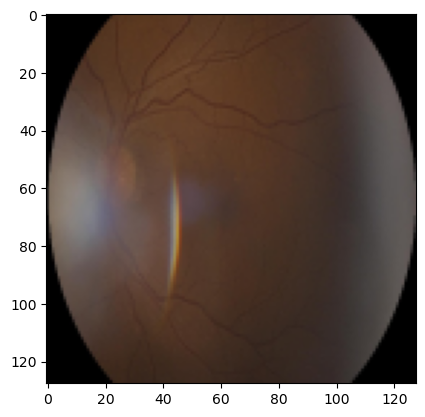

In [12]:
i = 359
plt.imshow(x_train[i]), y_train[i]

(<matplotlib.image.AxesImage at 0x7f00a91a28b0>, array([0, 1], dtype=int8))

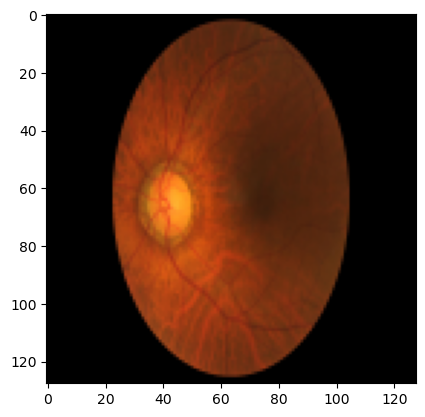

In [13]:
i = 358
plt.imshow(x_train[i]), y_train[i]

## Create DL Model and **Train**

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAveragePooling2D, ReLU, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm

2023-07-26 06:47:33.714709: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [15]:

i = Input(shape=(128,128,3), batch_size=None)
x = Conv2D(filters=256, kernel_size=(10,10), activation='relu', name='block1_conv1',
           strides=(1,1), padding='valid', kernel_initializer='glorot_uniform',
           kernel_regularizer=regularizers.L1(0.01), kernel_constraint=max_norm(2.))(i)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2), strides=2)(x)

x = Conv2D(filters=512, kernel_size=(5,5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=(2,2), strides=2)(x)
# x = Conv2D(filters=1024, kernel_size=(5,5))(x)
# x = Conv2D(filters=2048, kernel_size=(5,5))(x)
# x = MaxPool2D(pool_size=(2,2), strides=2)(x)

x = GlobalAveragePooling2D()(x)
# x = Dense(units=2048, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(units=1024, activation='relu')(x)
# x = Dropout(0.25)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=16, activation='relu')(x)
x = Dropout(0.3)(x)

prediction = Dense(units=2, activation='sigmoid')(x)

model = Model(i, prediction)


2023-07-26 06:47:38.618910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 06:47:38.624901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 06:47:38.625488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 06:47:38.626406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 119, 119, 256)     77056     
                                                                 
 batch_normalization (BatchN  (None, 119, 119, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 256)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 512)       3277312   
                                                                 
 batch_normalization_1 (Batc  (None, 55, 55, 512)      2048  

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=x_train, y=y_train, epochs=32, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/32


2023-07-26 06:47:41.813012: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-07-26 06:47:42.476243: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-26 06:47:42.477121: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-26 06:47:42.477157: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-07-26 06:47:42.477934: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-26 06:47:42.478030: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


78/78 [==============================] - 24s 229ms/step - loss: 1.4478 - accuracy: 0.7439 - val_loss: 0.8620 - val_accuracy: 0.7517
Epoch 2/32
78/78 [==============================] - 14s 183ms/step - loss: 0.7974 - accuracy: 0.7628 - val_loss: 0.7736 - val_accuracy: 0.7517
Epoch 3/32
78/78 [==============================] - 14s 183ms/step - loss: 0.7467 - accuracy: 0.7628 - val_loss: 0.7870 - val_accuracy: 0.7517
Epoch 4/32
78/78 [==============================] - 14s 184ms/step - loss: 0.7436 - accuracy: 0.7704 - val_loss: 0.7841 - val_accuracy: 0.7517
Epoch 5/32
78/78 [==============================] - 14s 184ms/step - loss: 0.7739 - accuracy: 0.7684 - val_loss: 0.7466 - val_accuracy: 0.7608
Epoch 6/32
78/78 [==============================] - 14s 184ms/step - loss: 0.7224 - accuracy: 0.7777 - val_loss: 0.7381 - val_accuracy: 0.7631
Epoch 7/32
78/78 [==============================] - 14s 185ms/step - loss: 0.7158 - accuracy: 0.7704 - val_loss: 0.7192 - val_accuracy: 0.7608
Epoch 8/32